In [132]:
import geopandas as gpd
from tqdm import tqdm
from shapely.validation import explain_validity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
from itertools import cycle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [464]:
os.chdir("../scripts")
from clustering_operations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [465]:
file = "../data/shapefiles/FAPAN_domain_fixed_geometry/FAPAN_domain_fixed_geometry.shp"    

# open file
shp = gpd.read_file(file)

SUBID = 8321636 and 9321636 have same polygon shape -> VANNO TOLTI per l'algoritmo di clustering

In [466]:
shp['validity'] = shp.apply(lambda row: explain_validity(row.geometry), axis=1)
shp[shp['validity'] != 'Valid Geometry'].shape

(0, 22)

rows to drop because something is invalid 4342, 15720, 19878

In [37]:
#shp = shp.drop([4342, 15720, 19878])
#shp.shape

(35405, 22)

In [467]:
df = pd.read_csv("../data/matrix_FAPAN.csv", sep=' ')
#df.rename(columns={'subID': 'SUBID'}, inplace=True)

In [468]:
df = df.reset_index()
df.insert(0, 'SUBID', shp['SUBID'])
df['SUBID'] = df['SUBID'].astype(int)

In [469]:
df[df['SUBID']!=df['index']]

,SUBID,index,1,2,3,4,5,6,7,8,...,303,304,305,306,307,308,309,310,311,312
5331,8000594,8000610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.319286,0.106083,1.127125,1.140095,0.905833,1.006000,1.118625,NaN,NaN,NaN
5332,8000610,8000612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5333,8000612,8000611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.406667,-0.368833,0.567833,0.611889,0.377333,0.530125,0.867333,NaN,NaN,NaN
5334,8000611,8000594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.608958,0.192417,1.254905,0.574556,0.414178,0.734689,1.387556,NaN,NaN,NaN
8073,8300058,8300592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.296333,1.796067,-0.089600,-0.268800,-0.248000,-0.704333,-0.227000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30175,9604332,9618196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.102875,0.475875,-0.124750,-1.602417,-1.157792,0.391375,0.849625,0.885958,-0.327708,-0.669000
30176,9618196,9600407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.369583,0.521083,1.065250,-0.137333,1.000167,0.608750,-0.163000,-0.573167,-0.637083,0.119250
30177,9600407,9617695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.618143,0.783762,1.605238,0.363933,0.323619,0.646000,0.282524,0.648476,0.868381,NaN
30178,9617695,9601088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.311000,-0.251167,0.414667,0.304500,1.032833,0.433333,0.112833,0.088500,-0.195000,0.586132


In [470]:
df = df.drop(['index'],axis=1)
df.shape

(35408, 313)

In [471]:
df = pd.concat([df['SUBID'], df.iloc[:,-204:]], axis=1)
rename_mapping = {df.columns[-204+i]: str(i + 1) for i in range(204)}
df.rename(columns=rename_mapping, inplace=True)

In [472]:
df

,SUBID,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,8801544,NaN,NaN,NaN,NaN,-1.318167,-0.710667,-1.528167,-1.899333,-1.409667,...,NaN,-1.370000,-0.260333,-0.206061,0.564500,0.652833,0.734500,NaN,NaN,NaN
1,8801548,NaN,NaN,NaN,NaN,-0.671554,-0.407242,-0.516090,-0.809722,-1.286169,...,NaN,-0.882667,-0.690604,-2.733667,-0.385919,0.924309,0.417711,NaN,NaN,NaN
2,8000005,NaN,NaN,0.316444,0.187556,0.371778,-0.197000,-0.361333,1.086444,0.963111,...,NaN,-0.461184,1.374222,0.705667,0.906444,0.006111,0.671000,1.385000,NaN,NaN
3,8115258,NaN,NaN,-0.092833,-0.245083,0.815444,-0.115556,-0.607519,1.011852,0.708333,...,NaN,-1.772971,1.125889,0.715222,1.261407,-0.258074,-0.028667,-0.118792,NaN,NaN
4,8115717,NaN,NaN,1.011778,0.242000,-0.082444,-1.187556,-0.751778,0.860667,1.069778,...,NaN,-0.675084,1.587889,1.250889,1.530667,-0.349889,0.421222,1.035111,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35403,9566395,NaN,-0.095333,0.369833,0.870333,-0.808333,-0.600833,-0.217667,-0.116167,1.317833,...,0.063833,-1.167333,1.347833,0.792500,0.670333,0.271500,0.714667,-0.216667,0.157000,NaN
35404,9581818,NaN,-2.175111,-0.554933,0.682400,-0.305400,-1.754267,-1.219133,0.590200,1.238533,...,-0.984333,-0.536200,0.372667,-0.243667,1.084733,0.253333,0.235733,0.637400,NaN,NaN
35405,9524166,0.383167,-0.174833,-0.867500,-0.657000,0.157000,-0.911500,-0.898167,-0.902500,0.759833,...,0.818500,0.143000,1.210167,-0.834000,1.320500,1.582167,0.873333,0.259167,0.344667,-1.160333
35406,9581815,NaN,-1.694333,-0.094606,0.463182,-0.502667,-1.733000,-0.600292,0.641636,1.337212,...,-0.876273,-0.489000,0.391727,1.161333,1.883485,0.399333,-0.062667,0.216606,NaN,NaN


<AxesSubplot:>

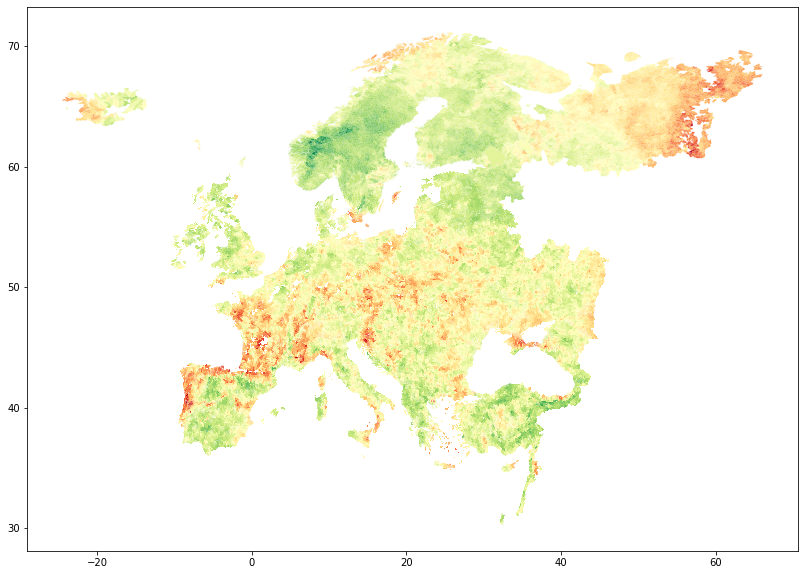

In [473]:
shp.plot(figsize=(16,10), column=df['198'], cmap='RdYlGn')

In [474]:
df.insert(1, 'x', shp['LONGITUDE'])
#df['x'] = df['x'].astype(float)
df.insert(2, 'y', shp['LATITUDE'])
#df['y'] = df['y'].astype(float)

In [301]:
df_5_20_35_50 = df[(df['x'].astype(float) >= 5) & (df['x'].astype(float) <= 20) & (df['y'].astype(float) >= 35) & (df['y'].astype(float) <= 50)]

In [302]:
df_5_20_35_50.shape

(4114, 207)

In [285]:
shp_5_20_35_50 = shp[(shp['LONGITUDE'].astype(float) >= 5) & (shp['LONGITUDE'].astype(float) <= 20) & (shp['LATITUDE'].astype(float) >= 35) & (shp['LATITUDE'].astype(float) <= 50)]

<AxesSubplot:>

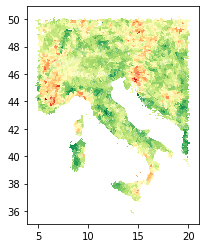

In [286]:
shp_5_20_35_50.plot(column=df_5_20_35_50['198'], cmap='RdYlGn')

In [287]:
def select_columns_by_months(dataframe, selected_months):
    selected_columns = []

    for i in range((dataframe.shape[1] - 3) // 12):
        selected_columns.extend([month + i * 12 for month in selected_months])

    all_columns = np.arange(1, dataframe.shape[1] - 2)
    columns_to_drop = np.setdiff1d(all_columns, np.array(selected_columns))
    columns_to_drop = [str(i) for i in columns_to_drop]

    filtered_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return filtered_dataframe

In [303]:
df_5_20_35_50_august = select_columns_by_months(df_5_20_35_50, [8])
df_5_20_35_50_august.shape

(4114, 20)

In [304]:
df_5_20_35_50_august_noNA = df_5_20_35_50_august.dropna()
df_5_20_35_50_august_noNA.shape

(4089, 20)

In [305]:
df_5_20_35_50_august_noNA

,SUBID,x,y,8,20,32,44,56,68,80,92,104,116,128,140,152,164,176,188,200
10513,9700175,8.9291,44.4667,0.453222,-0.248556,-0.940833,0.291000,-0.616333,-0.924389,0.564222,0.206556,0.428556,1.001389,-0.174667,1.213500,-0.136778,-2.170389,0.949722,0.246556,1.471111
10525,9737807,14.1867,37.3508,-1.879933,-0.794000,-0.110667,0.884600,0.357067,-0.126133,-0.431733,0.293733,0.035533,0.728267,-0.250267,0.345133,0.317000,2.701600,-0.130133,-0.677533,1.428800
10526,9737855,13.9083,37.2542,-2.326556,-0.634000,0.114889,0.256556,0.064333,-0.448000,-0.251667,0.345889,0.101556,0.787556,-0.199000,0.339333,0.442222,2.751111,-0.451667,0.086667,1.105556
10527,9737880,14.1875,37.7167,-1.113583,-0.704583,0.689417,0.097917,-0.448167,-0.349083,-0.908250,-0.030417,0.081583,0.427917,-0.307833,-0.206333,0.931500,3.139167,0.153000,-0.288000,0.556917
10528,9737929,13.9458,37.3458,-2.238333,-0.681500,0.239500,0.537167,0.531000,-0.408167,-0.356333,0.377833,0.108167,0.857000,-0.342500,0.246500,0.183833,2.585500,-0.481333,-0.290667,1.081167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,9771281,14.2625,42.3125,0.226533,-0.253533,0.819133,0.711667,-0.345067,-2.094233,-0.236067,0.711867,0.520533,0.855400,-0.020433,0.125033,0.356033,-0.920567,1.647267,-0.449033,1.034400
33094,9744553,13.0267,43.5542,1.334083,-1.314208,-0.750667,0.846542,0.390292,-1.172000,0.092417,-0.086917,0.682833,-0.400375,-1.136542,0.653500,1.545167,0.202542,1.416500,-0.930875,0.772375
35333,9740700,13.2242,46.0325,0.847030,-1.886212,0.695091,0.344455,-0.767970,-0.589636,0.312818,0.601303,0.644545,0.491788,-0.489091,-0.948273,0.580212,-1.482818,0.423636,0.492394,0.260424
35366,9744162,13.2908,43.4042,0.669190,-1.492048,-0.193619,0.782905,0.683762,-1.169952,-0.032476,0.270000,0.615476,-0.189857,-1.269476,0.799667,1.387524,-0.317143,1.471714,-0.753286,0.775429


In [306]:
# Reset the index of df_5_20_35_50_august_noNA to default integer-based index
df_5_20_35_50_august_noNA = df_5_20_35_50_august_noNA.reset_index(drop=True)

In [307]:
shp_5_20_35_50_august_noNA = shp_5_20_35_50[shp_5_20_35_50['SUBID'].isin(df_5_20_35_50_august_noNA['SUBID'])]

In [308]:
shp_5_20_35_50_august_noNA = shp_5_20_35_50_august_noNA.reset_index(drop=True)

In [309]:
df_5_20_35_50_august_noNA

,SUBID,x,y,8,20,32,44,56,68,80,92,104,116,128,140,152,164,176,188,200
0,9700175,8.9291,44.4667,0.453222,-0.248556,-0.940833,0.291000,-0.616333,-0.924389,0.564222,0.206556,0.428556,1.001389,-0.174667,1.213500,-0.136778,-2.170389,0.949722,0.246556,1.471111
1,9737807,14.1867,37.3508,-1.879933,-0.794000,-0.110667,0.884600,0.357067,-0.126133,-0.431733,0.293733,0.035533,0.728267,-0.250267,0.345133,0.317000,2.701600,-0.130133,-0.677533,1.428800
2,9737855,13.9083,37.2542,-2.326556,-0.634000,0.114889,0.256556,0.064333,-0.448000,-0.251667,0.345889,0.101556,0.787556,-0.199000,0.339333,0.442222,2.751111,-0.451667,0.086667,1.105556
3,9737880,14.1875,37.7167,-1.113583,-0.704583,0.689417,0.097917,-0.448167,-0.349083,-0.908250,-0.030417,0.081583,0.427917,-0.307833,-0.206333,0.931500,3.139167,0.153000,-0.288000,0.556917
4,9737929,13.9458,37.3458,-2.238333,-0.681500,0.239500,0.537167,0.531000,-0.408167,-0.356333,0.377833,0.108167,0.857000,-0.342500,0.246500,0.183833,2.585500,-0.481333,-0.290667,1.081167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,9771281,14.2625,42.3125,0.226533,-0.253533,0.819133,0.711667,-0.345067,-2.094233,-0.236067,0.711867,0.520533,0.855400,-0.020433,0.125033,0.356033,-0.920567,1.647267,-0.449033,1.034400
4085,9744553,13.0267,43.5542,1.334083,-1.314208,-0.750667,0.846542,0.390292,-1.172000,0.092417,-0.086917,0.682833,-0.400375,-1.136542,0.653500,1.545167,0.202542,1.416500,-0.930875,0.772375
4086,9740700,13.2242,46.0325,0.847030,-1.886212,0.695091,0.344455,-0.767970,-0.589636,0.312818,0.601303,0.644545,0.491788,-0.489091,-0.948273,0.580212,-1.482818,0.423636,0.492394,0.260424
4087,9744162,13.2908,43.4042,0.669190,-1.492048,-0.193619,0.782905,0.683762,-1.169952,-0.032476,0.270000,0.615476,-0.189857,-1.269476,0.799667,1.387524,-0.317143,1.471714,-0.753286,0.775429


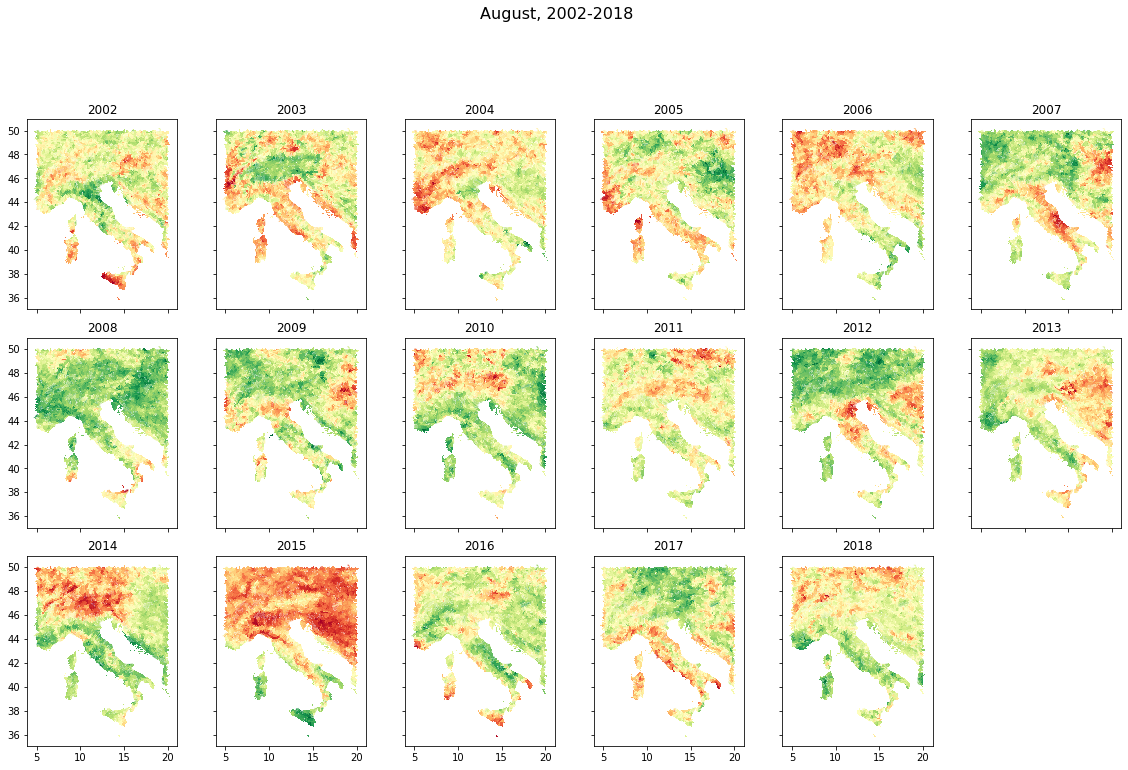

In [310]:
fig, axs = plt.subplots(3, 6, figsize=(20, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0.15, 'wspace' : 0.10})
fig.suptitle('August, 2002-2018', fontsize=16)
k=0
for i in range(2):
    for j in range(6):
        shp_5_20_35_50_august_noNA.plot(column=df_5_20_35_50_august_noNA.iloc[:, 3+k], ax=axs[i][j], cmap='RdYlGn')
        axs[i][j].set_title(f'{2002+k}', fontsize=12)
        k += 1
for j in range(5):
    shp_5_20_35_50_august_noNA.plot(column=df_5_20_35_50_august_noNA.iloc[:, 3+k], ax=axs[2][j], cmap='RdYlGn')
    axs[2][j].set_title(f'{2002+k}', fontsize=12)
    k += 1

plt.subplots_adjust(top=0.85)

fig.delaxes(axs[2,5])
#plt.savefig(fname='availability_each_month.png')
plt.show()


## Compute neighbours

In [311]:
# add NEIGHBORS column
shp_5_20_35_50_august_noNA["NEIGHBOURS"] = None  
    
progress_bar = tqdm(total=shp_5_20_35_50_august_noNA.shape[0], position=0, leave=True, smoothing=0)

for index, country in shp_5_20_35_50_august_noNA.iterrows():   
    #print(index)
    # get 'not disjoint' countries
    neighbors = shp_5_20_35_50_august_noNA[~shp_5_20_35_50_august_noNA.geometry.disjoint(country.geometry)]['SUBID'].tolist()

    # remove own name of the country from the list
    neighbors = [ name for name in neighbors if country['SUBID'] != name ]

    # add names of neighbors as NEIGHBORS value
    shp_5_20_35_50_august_noNA.at[index, "NEIGHBOURS"] = neighbors
                   
    progress_bar.update(1)  

  0%|          | 3/4089 [00:00<02:45, 24.65it/s]

100%|█████████▉| 4074/4089 [00:36<00:00, 112.29it/s]

In [ ]:
shp_sep = shp.copy()

In [ ]:
shp_sep['NEIGHBOURS'] = shp['NEIGHBOURS'].apply(lambda x: ', '.join(map(str, x)) if x else '')  # Convert elements to string

In [ ]:
shp_sep.to_file("../data/shapefiles/FAPAN_neighbours/FAPAN_neighbours.shp")

<AxesSubplot:>

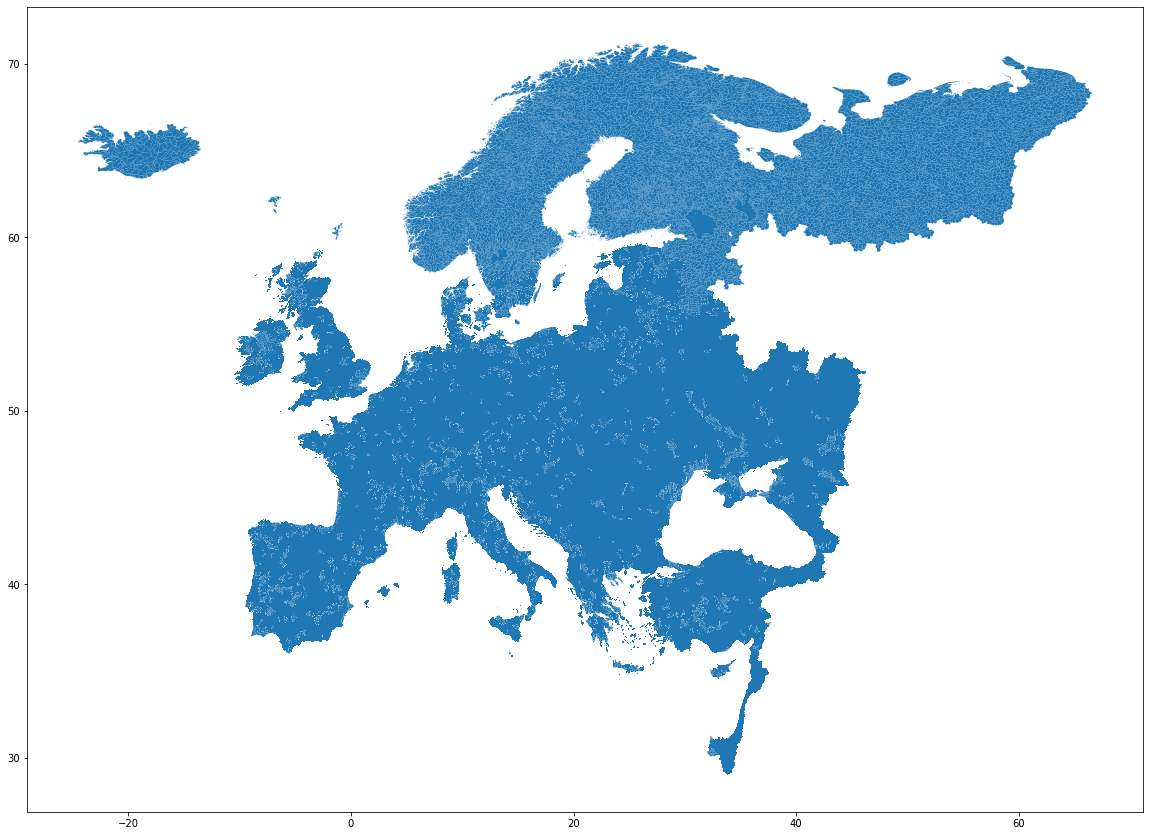

In [ ]:
shp_sep.plot(figsize=(20,20))

In [312]:
# Create a set to store unique pairs
unique_pairs = set()

# Iterate over each row and generate pairs
for index, row in shp_5_20_35_50_august_noNA.iterrows():
    subid = row['SUBID']
    neighbors = row['NEIGHBOURS']
    
    # Generate pairs and add to the set
    for neighbor in neighbors:
        pair = tuple(sorted([subid, neighbor]))
        unique_pairs.add(pair)

100%|██████████| 4089/4089 [00:54<00:00, 75.59it/s] 

In [313]:
neighbours = []
for couple in unique_pairs:
    subid_x_y = [f"{df_5_20_35_50_august_noNA.loc[df_5_20_35_50_august_noNA['SUBID'] == subid, 'x'].values[0]}_{df_5_20_35_50_august_noNA.loc[df_5_20_35_50_august_noNA['SUBID'] == subid, 'y'].values[0]}" for subid in couple]
    neighbours.append(tuple(subid_x_y))

In [ ]:
df_without_neighbours = shp_5_20_35_50_august_noNA[shp_5_20_35_50_august_noNA["NEIGHBOURS"].apply(len)==0][["LATITUDE", "LONGITUDE"]]
without_neighbours = ['{}_{}'.format(row['LONGITUDE'], row['LATITUDE']) for index, row in df_without_neighbours.iterrows()]

## Compute and visualize clusterings

In [314]:
df = df_5_20_35_50_august_noNA.copy()

transposed_df = df.T
df = pd.DataFrame(transposed_df.values, columns=[str(transposed_df.iloc[1, i]) + '_' + str(transposed_df.iloc[2, i]) for i in range(len(transposed_df.columns))])
df.drop([0, 1, 2], inplace=True)
df.reset_index(drop=True, inplace=True)

In [338]:
df = df.astype(float)

df['13.9024_58.1193'] CONTIENE IL DUPLICATO

In [ ]:
#df = df.loc[:,~df.columns.duplicated()]

In [449]:
def plot_clusters_shp(shapefile, clusters, figsize=(8,8)):
    shp = shapefile.copy()
    shp = shp.drop("ClusterID", axis=1)
    #shp["CLUSTERID"] = 0  

    clusters_no_singletons = remove_singletons(clusters)
    singletons = clusters[len(clusters_no_singletons):]
    
    print(f'No. clusters (w/o singletons) = {len(clusters_no_singletons)}')
    print(f'No. singletons = {len(singletons)}')
        
    progress_bar = tqdm(total=shp.shape[0], position=0, leave=True, smoothing=0)

    

    clusterid = 0
    for cluster in clusters:
        for coordinate in cluster:
            coordinate = coordinate.split('_')
            shp.loc[((shp['LONGITUDE'] == coordinate[0]) & (shp['LATITUDE'] == coordinate[1])), 'CLUSTERID'] = clusterid
                    
            progress_bar.update(1)
        
        clusterid += 1 

    unique_cluster_ids = shp['CLUSTERID'].unique()
    num_unique_ids = len(unique_cluster_ids)
    seed_value = 45
    np.random.seed(seed_value)
    random_colors = np.random.rand(num_unique_ids, 3)  # RGB values

    # Create a dictionary to map CLUSTERID to its corresponding random color
    clusterid_to_color = dict(zip(unique_cluster_ids, random_colors))


    # Map each CLUSTERID to its corresponding random color

    shp['color'] = shp['CLUSTERID'].apply(lambda x: clusterid_to_color[x])

    shp.plot(figsize=figsize, color=shp['color'])

In [433]:
clusters_corr08 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.8)

Computing neighbors strengths...


100%|██████████| 11687/11687 [00:06<00:00, 1767.36it/s]


Neighbors strengths computed.
Computing clusters...


4184it [07:25,  9.39it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 91
No. singletons = 109


  0%|          | 0/4089 [00:00<?, ?it/s]

100%|██████████| 4089/4089 [00:29<00:00, 140.17it/s]


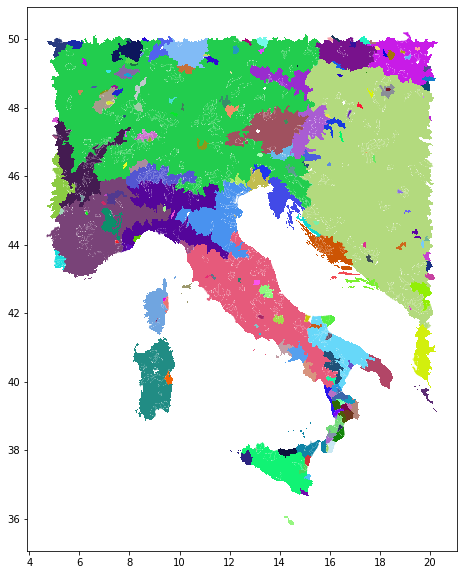

In [450]:
plot_clusters_shp(shp_5_20_35_50_august_noNA, clusters_corr08, figsize=(10,10))

In [453]:
clusters_corr085 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.85)

Computing neighbors strengths...


  0%|          | 0/11687 [00:00<?, ?it/s]

100%|██████████| 11687/11687 [00:04<00:00, 2907.74it/s]


Neighbors strengths computed.
Computing clusters...


4465it [09:28,  7.86it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 193
No. singletons = 189


  0%|          | 0/4089 [00:00<?, ?it/s]

100%|██████████| 4089/4089 [00:22<00:00, 182.51it/s]


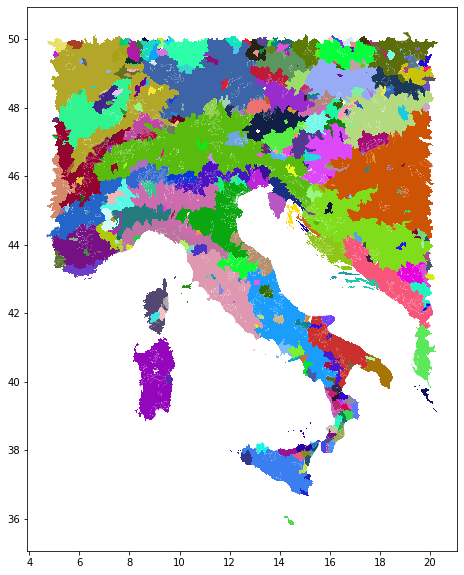

In [455]:
plot_clusters_shp(shp_5_20_35_50_august_noNA, clusters_corr085, figsize=(10,10))

In [462]:
clusters_corr09 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.9)

Computing neighbors strengths...


100%|██████████| 11687/11687 [00:06<00:00, 1687.76it/s]


Neighbors strengths computed.
Computing clusters...


5238it [08:18, 10.50it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 363
No. singletons = 445


100%|██████████| 4089/4089 [00:12<00:00, 314.62it/s]


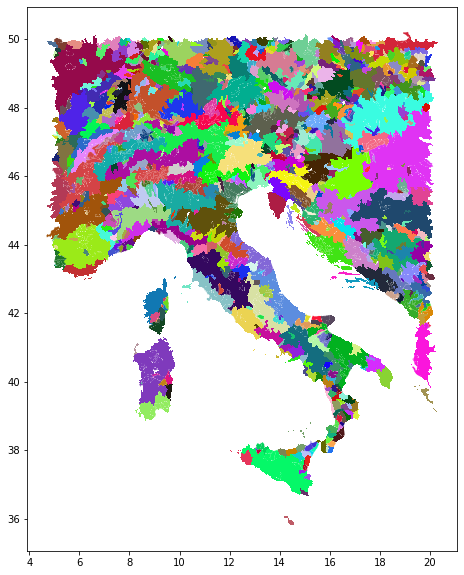

In [461]:
plot_clusters_shp(shp_5_20_35_50_august_noNA, clusters_corr09, figsize=(10,10))